In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
xls = pd.ExcelFile('/Users/ankitadhawan/Desktop/ISB Hackathon Dataset/Ankita_updated_data/Hackathon_education.xlsx')
df = pd.read_excel(xls, '%Data')
df.head()

,Year,State_name,State_code,District_name,District_code,villages_surveyed,tot_pop,pop_male,pop_female,tot_hh,prim_school,middle_school,high_school,high_second_school,degree_clg,public_library,indoor_sports,outdoor_sports,both_sports,vocational
0,2019,JAMMU AND KASHMIR,1,ANANTNAG,1,506,1106470,579200,527270,176367,0.758893,0.810277,0.363636,0.126482,0.021739,0.007905,0.083004,0.146245,0.047431,0.033597
1,2019,JAMMU AND KASHMIR,1,BADGAM,2,520,805861,420700,385161,111089,0.350000,0.830769,0.807692,0.665385,0.200000,0.138462,0.011538,0.048077,0.067308,0.240385
2,2019,JAMMU AND KASHMIR,1,BARAMULLA,3,628,1155256,616036,539220,174729,0.761146,0.735669,0.315287,0.109873,0.017516,0.017516,0.030255,0.269108,0.025478,0.022293
3,2019,JAMMU AND KASHMIR,1,DODA,4,454,513303,273067,240236,108537,0.775330,0.645374,0.310573,0.127753,0.011013,0.008811,0.026432,0.129956,0.026432,0.008811
4,2019,JAMMU AND KASHMIR,1,JAMMU,5,913,1013853,539429,474424,213114,0.496166,0.338445,0.173056,0.055860,0.012048,0.003286,0.012048,0.048193,0.028478,0.007667


In [4]:
df_dep=pd.read_excel(xls, 'Dep_Data')
df_dep.head()

,Year,State_name,State_code,District_name,District_code,villages_surveyed,tot_pop,pop_male,pop_female,tot_hh,...,middle_school,high_school,high_second_school,degree_clg,public_library,indoor_sports,outdoor_sports,both_sports,vocational,Dep_Index
0,2019,JAMMU AND KASHMIR,1,ANANTNAG,1,506,1106470,579200,527270,176367,...,0,0,1,1,1,1,1,1,1,0.7
1,2019,JAMMU AND KASHMIR,1,BADGAM,2,520,805861,420700,385161,111089,...,0,0,0,1,1,1,1,1,1,0.6
2,2019,JAMMU AND KASHMIR,1,BARAMULLA,3,628,1155256,616036,539220,174729,...,0,0,1,1,1,1,1,1,1,0.7
3,2019,JAMMU AND KASHMIR,1,DODA,4,454,513303,273067,240236,108537,...,0,0,1,1,1,1,1,1,1,0.7
4,2019,JAMMU AND KASHMIR,1,JAMMU,5,913,1013853,539429,474424,213114,...,0,1,1,1,1,1,1,1,1,0.8


In [5]:
X=df[['prim_school','middle_school', 'high_school','high_second_school','degree_clg','public_library','indoor_sports','outdoor_sports','both_sports','vocational']].values
X

array([[0.75889328, 0.81027668, 0.36363636, ..., 0.14624506, 0.04743083,
        0.03359684],
       [0.35      , 0.83076923, 0.80769231, ..., 0.04807692, 0.06730769,
        0.24038462],
       [0.7611465 , 0.73566879, 0.31528662, ..., 0.26910828, 0.02547771,
        0.02229299],
       ...,
       [0.90857143, 0.32      , 0.16857143, ..., 0.05142857, 0.04571429,
        0.01142857],
       [0.76      , 0.88      , 0.352     , ..., 0.088     , 0.008     ,
        0.        ],
       [0.56589147, 0.6744186 , 0.29457364, ..., 0.17054264, 0.00775194,
        0.01550388]])

In [6]:
X_dep=df_dep[['prim_school','middle_school','high_school','high_second_school','degree_clg','public_library','indoor_sports','outdoor_sports','both_sports','vocational']].values
X_dep

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

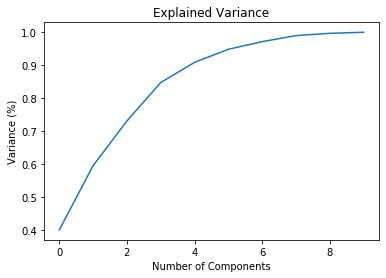

In [7]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_dep)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

plt.show()

In [20]:
## Select Number of PCA compnents based on the above graph
pca_dep = PCA(n_components = 3).fit(X_dep).transform(X_dep)
pca_perc = PCA(n_components = 4).fit(X).transform(X)

In [21]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

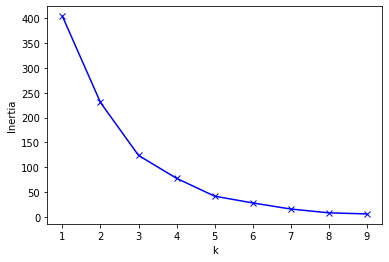

In [22]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(pca_dep)
    kmeanModel.fit(pca_dep)
    inertia.append(kmeanModel.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [23]:
  kmeans = KMeans(n_clusters=3, random_state=10).fit(pca_dep)

In [24]:
print('Silhouette Score: ',metrics.silhouette_score(pca_dep,kmeans.labels_))

Silhouette Score:  0.6802625489092403


In [25]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(pca_dep)
print('Silhouette Score: ',metrics.silhouette_score(pca_dep,kmeans.labels_))

Silhouette Score:  0.7314013790944399


In [26]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(pca_dep)
print('Silhouette Score: ',metrics.silhouette_score(pca_dep,kmeans.labels_))

Silhouette Score:  0.804578138652982


In [44]:
#Choose number of clusters
kmeans = KMeans(n_clusters=4, random_state=1).fit(pca_dep)

#Attach cluster to main dataset
labelsKM_PCA = pd.DataFrame(kmeans.labels_)
labelled_KM_PCA = pd.concat((df_dep,labelsKM_PCA),axis=1)
labelled_KM_PCA = labelled_KM_PCA.rename({0:'labels'},axis=1)
labelled_KM_PCA['labels'].value_counts()

0    381
1    145
3    103
2     78
Name: labels, dtype: int64

In [45]:
labelled_KM_PCA.head()

,Year,State_name,State_code,District_name,District_code,villages_surveyed,tot_pop,pop_male,pop_female,tot_hh,...,high_school,high_second_school,degree_clg,public_library,indoor_sports,outdoor_sports,both_sports,vocational,Dep_Index,labels
0,2019,JAMMU AND KASHMIR,1,ANANTNAG,1,506,1106470,579200,527270,176367,...,0,1,1,1,1,1,1,1,0.7,3
1,2019,JAMMU AND KASHMIR,1,BADGAM,2,520,805861,420700,385161,111089,...,0,0,1,1,1,1,1,1,0.6,3
2,2019,JAMMU AND KASHMIR,1,BARAMULLA,3,628,1155256,616036,539220,174729,...,0,1,1,1,1,1,1,1,0.7,3
3,2019,JAMMU AND KASHMIR,1,DODA,4,454,513303,273067,240236,108537,...,0,1,1,1,1,1,1,1,0.7,3
4,2019,JAMMU AND KASHMIR,1,JAMMU,5,913,1013853,539429,474424,213114,...,1,1,1,1,1,1,1,1,0.8,0


In [46]:
eduinfra_df = pd.merge(df,labelled_KM_PCA[['District_code','labels','Dep_Index']],on='District_code').sort_values(by='Dep_Index')
eduinfra_df.head()

,Year,State_name,State_code,District_name,District_code,villages_surveyed,tot_pop,pop_male,pop_female,tot_hh,...,high_school,high_second_school,degree_clg,public_library,indoor_sports,outdoor_sports,both_sports,vocational,labels,Dep_Index
631,2019,KERALA,32,MALAPPURAM,562,123,3393467,1622539,1770928,675915,...,0.910569,0.878049,0.512195,0.943089,0.040650,0.569106,0.317073,0.333333,2,0.1
634,2019,KERALA,32,THIRUVANANTHAPURAM,565,104,2172538,1033358,1139180,566177,...,0.903846,0.798077,0.336538,0.951923,0.067308,0.403846,0.384615,0.403846,2,0.1
629,2019,KERALA,32,KOTTAYAM,560,123,1685499,826142,859357,425529,...,0.813008,0.731707,0.308943,0.796748,0.056911,0.512195,0.113821,0.341463,2,0.2
630,2019,KERALA,32,KOZHIKODE,561,100,2101475,1000939,1100536,486987,...,0.910000,0.840000,0.420000,0.960000,0.060000,0.730000,0.090000,0.310000,2,0.2
624,2019,KERALA,32,ERNAKULAM,555,120,2135998,1055818,1080180,535391,...,0.866667,0.841667,0.366667,0.941667,0.066667,0.566667,0.200000,0.325000,2,0.2


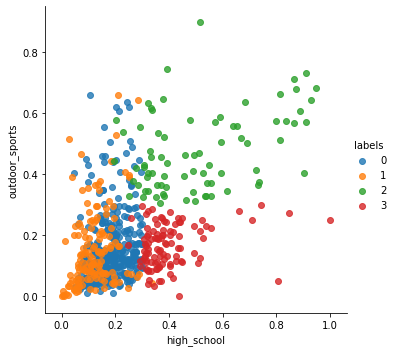

In [47]:
sns.lmplot(x='high_school',y='outdoor_sports',data=eduinfra_df,hue='labels',fit_reg=False)